<a href="https://colab.research.google.com/github/kridtapon/Backtest-DCA/blob/main/Backtest_DCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import yfinance as yf

def dca_backtest(ticker, start_date, end_date, investment_amount, frequency):
    """
    Backtest a Dollar-Cost Averaging (DCA) strategy.

    :param ticker: Stock ticker symbol (e.g., 'AAPL')
    :param start_date: Start date of the backtest (e.g., '2020-01-01')
    :param end_date: End date of the backtest (e.g., '2023-01-01')
    :param investment_amount: Amount to invest each time (e.g., 100)
    :param frequency: Frequency of investment ('monthly', 'weekly', 'daily')
    :return: DataFrame with results
    """
    # Download historical data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Resample data based on frequency
    if frequency == 'monthly':
        data = data.resample('M').last()
    elif frequency == 'weekly':
        data = data.resample('W').last()
    elif frequency == 'daily':
        pass  # Use daily data as is

    # Initialize variables
    total_shares = 0
    total_investment = 0

    # Perform DCA
    for date, row in data.iterrows():
        price = row['Close']
        shares_bought = investment_amount / price
        total_shares += shares_bought
        total_investment += investment_amount

    # Calculate final portfolio value
    final_price = data.iloc[-1]['Close']
    portfolio_value = total_shares * final_price

    # Print results
    print(f"Total Investment: {total_investment:.2f}")
    print(f"Total Shares: {total_shares.values}")
    print(f"Final Portfolio Value: ${portfolio_value.values}")
    print(f"Return: {((portfolio_value.values - total_investment) / total_investment) * 100} %")

    # return data

# Example usage
dca_backtest('BTC-USD','2020-01-01', '2025-01-01', 1000, 'monthly')

[*********************100%***********************]  1 of 1 completed

Total Investment: 60000.00
Total Shares: [2.48931776]
Final Portfolio Value: $[232574.97430963]
Return: [287.62495718] %



<ipython-input-7-11ee85003a8f>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').last()


[*********************100%***********************]  1 of 1 completed
<ipython-input-6-db41f291ac50>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').last()
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


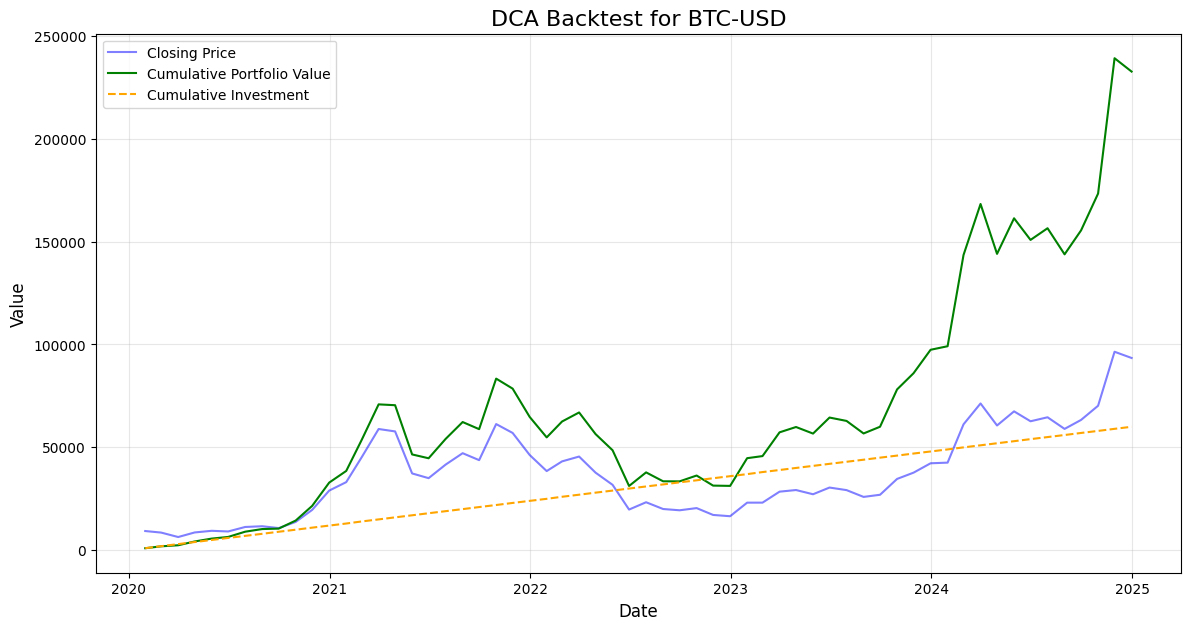

[*********************100%***********************]  1 of 1 completed

Ticker: BTC-USD
Total Investment: $60000.00
Error processing ticker BTC-USD: unsupported format string passed to Series.__format__



<ipython-input-6-db41f291ac50>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').last()
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


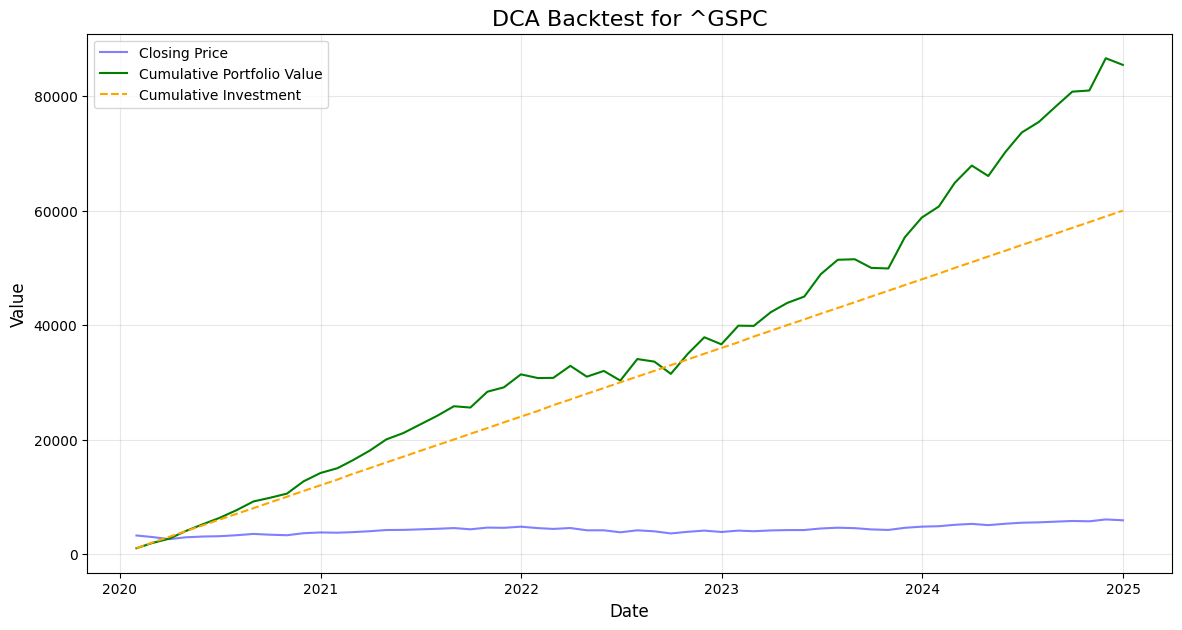

[*********************100%***********************]  1 of 1 completed

Ticker: ^GSPC
Total Investment: $60000.00
Error processing ticker ^GSPC: unsupported format string passed to Series.__format__



<ipython-input-6-db41f291ac50>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').last()
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


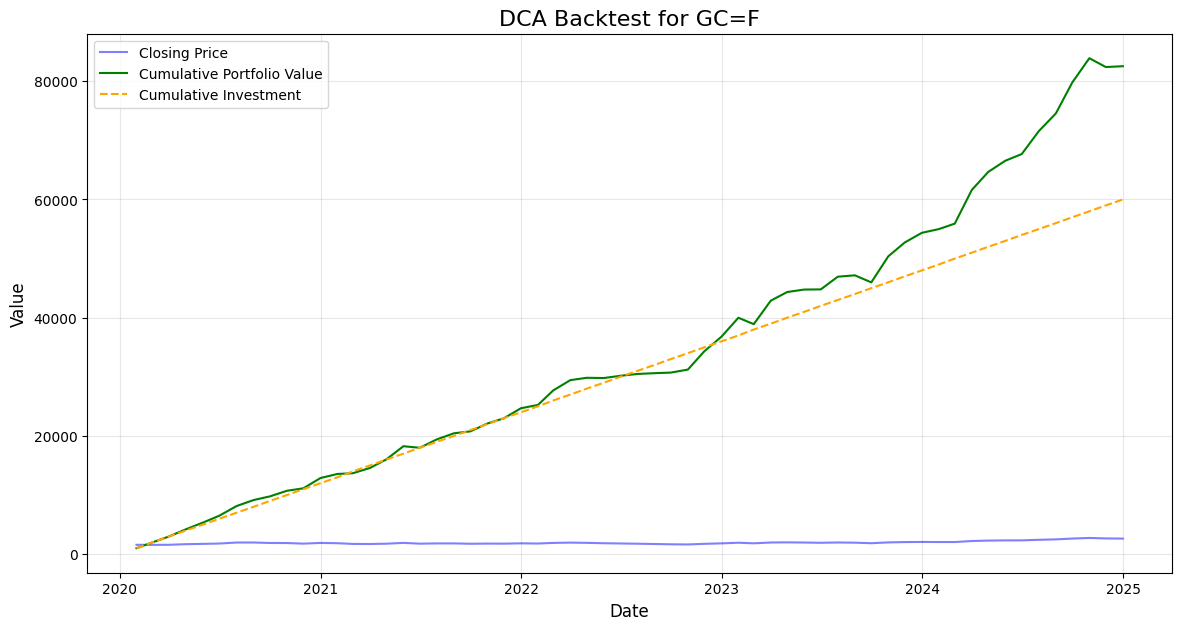

Ticker: GC=F
Total Investment: $60000.00
Error processing ticker GC=F: unsupported format string passed to Series.__format__


In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def dca_backtest_with_plot(ticker, start_date, end_date, investment_amount, frequency):
    """
    Backtest a Dollar-Cost Averaging (DCA) strategy with a plot.

    :param ticker: Stock ticker symbol (e.g., 'AAPL', 'BTC-USD')
    :param start_date: Start date of the backtest (e.g., '2020-01-01')
    :param end_date: End date of the backtest (e.g., '2023-01-01')
    :param investment_amount: Amount to invest each time (e.g., 100)
    :param frequency: Frequency of investment ('monthly', 'weekly', 'daily')
    """
    try:
        # Download historical data
        data = yf.download(ticker, start=start_date, end=end_date)

        if data.empty:
            raise ValueError(f"No data found for ticker: {ticker}")

        # Resample data based on frequency
        if frequency == 'monthly':
            data = data.resample('M').last()
        elif frequency == 'weekly':
            data = data.resample('W').last()
        elif frequency == 'daily':
            pass  # Use daily data as is
        else:
            raise ValueError("Invalid frequency. Choose from 'monthly', 'weekly', or 'daily'.")

        # Initialize variables
        total_shares = 0
        total_investment = 0
        cumulative_portfolio_value = []
        cumulative_investment = []

        # Perform DCA and calculate cumulative values
        for date, row in data.iterrows():
            price = row['Close']
            shares_bought = investment_amount / price
            total_shares += shares_bought
            total_investment += investment_amount

            # Calculate cumulative portfolio value and investment
            cumulative_portfolio_value.append(total_shares * price)
            cumulative_investment.append(total_investment)

        # Add cumulative values to the DataFrame
        data['Cumulative Portfolio Value'] = cumulative_portfolio_value
        data['Cumulative Investment'] = cumulative_investment

        # Plotting
        plt.figure(figsize=(14, 7))

        # Plot Closing Price
        plt.plot(data.index, data['Close'], label='Closing Price', color='blue', alpha=0.5)

        # Plot Cumulative Portfolio Value
        plt.plot(data.index, data['Cumulative Portfolio Value'], label='Cumulative Portfolio Value', color='green')

        # Plot Cumulative Investment
        plt.plot(data.index, data['Cumulative Investment'], label='Cumulative Investment', color='orange', linestyle='--')

        # Add labels and legend
        plt.title(f"DCA Backtest for {ticker}", fontsize=16)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.legend(loc='upper left')
        plt.grid(alpha=0.3)

        # Show plot
        plt.show()

        # Print final results
        print(f"Ticker: {ticker}")
        print(f"Total Investment: ${total_investment:.2f}")
        print(f"Final Portfolio Value: ${data['Cumulative Portfolio Value'].iloc[-1]:.2f}")
        print(f"Return: {((data['Cumulative Portfolio Value'].iloc[-1] - total_investment) / total_investment) * 100:.2f}%")
        print("-" * 50)

    except Exception as e:
        print(f"Error processing ticker {ticker}: {e}")

# Example usage
tickers = ['BTC-USD', '^GSPC', 'GC=F']

for ticker in tickers:
    dca_backtest_with_plot(ticker, '2020-01-01', '2025-01-01', 1000, 'monthly')